# Project: Oral Insulin Phase II Clinical Test

## Table of Contents

-  Introduction
-  Data Wrangling
-  Exploratory Data Analysis
-  Conclusion


## Introduction



### Data Description


> We will be looking at the phase two clinical trial data of 350 patients for a new innovative oral insulin called Auralin - a proprietary capsule that can solve this stomach lining problem.

>Phase two trials are intended to:

> •	Test the efficacy and the dose response of a drug

> •	Identify adverse reactions

>In this trial, half of the patients are being treated with Auralin, and the other 175 being treated with a popular injectable insulin called Novodra. By comparing key metrics between these two drugs, we can determine if Auralin is effective.


### Questions  for Analysis

After accessing and cleaning thne clinical dataset, we are ready to detrermine if the proposed new oral insulin, Auralin, compared to the injectable insulin Novodra in the following ways:


>-  Adverse Reactions

>-  Pre-trial Post-trial Mean Insulin Dose Change

>-  Pre-trial Post-trial Mean Hba1c Change



## Data Wrangling

### Gathering Data

In [1]:
# Import all required packages.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset

df_patients= pd.read_csv('patients.csv')
df_treatments= pd.read_csv('treatments.csv')
df_adverse_reactions= pd.read_csv('adverse_reactions.csv')

### Accessing General Properties


>-  Data is accessed. The shape od the dataset is determined and inspections are made to detect error in quality(content error) and tidiness(structural error).

In [3]:
df_patients.head(10)   # Inspect first ten rows of dataset

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
0,1,female,Zoe,Wellish,576 Brown Bear Drive,Rancho California,California,92390.0,United States,951-719-9170ZoeWellish@superrito.com,7/10/1976,121.7,66,19.6
1,2,female,Pamela,Hill,2370 University Hill Road,Armstrong,Illinois,61812.0,United States,PamelaSHill@cuvox.de+1 (217) 569-3204,4/3/1967,118.8,66,19.2
2,3,male,Jae,Debord,1493 Poling Farm Road,York,Nebraska,68467.0,United States,402-363-6804JaeMDebord@gustr.com,2/19/1980,177.8,71,24.8
3,4,male,Liêm,Phan,2335 Webster Street,Woodbridge,NJ,7095.0,United States,PhanBaLiem@jourrapide.com+1 (732) 636-8246,7/26/1951,220.9,70,31.7
4,5,male,Tim,Neudorf,1428 Turkey Pen Lane,Dothan,AL,36303.0,United States,334-515-7487TimNeudorf@cuvox.de,2/18/1928,192.3,27,26.1
5,6,male,Rafael,Costa,1140 Willis Avenue,Daytona Beach,Florida,32114.0,United States,386-334-5237RafaelCardosoCosta@gustr.com,8/31/1931,183.9,70,26.4
6,7,female,Mary,Adams,3145 Sheila Lane,Burbank,NV,84728.0,United States,775-533-5933MaryBAdams@einrot.com,11/19/1969,146.3,65,24.3
7,8,female,Xiuxiu,Chang,2687 Black Oak Hollow Road,Morgan Hill,CA,95037.0,United States,XiuxiuChang@einrot.com1 408 778 3236,8/13/1958,158.0,60,30.9
8,9,male,Dsvid,Gustafsson,1790 Nutter Street,Kansas City,MO,64105.0,United States,816-265-9578DavidGustafsson@armyspy.com,3/6/1937,163.9,66,26.5
9,10,female,Sophie,Cabrera,3303 Anmoore Road,New York,New York,10011.0,United States,SophieCabreraIbarra@teleworm.us1 718 795 9124,12/3/1930,194.7,64,33.4


In [4]:
df_treatments.head(10)   # Inspect first ten rows of dataset

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
0,veronika,jindrová,41u - 48u,-,7.63,7.20,NaN
1,elliot,richardson,-,40u - 45u,7.56,7.09,0.97
2,yukitaka,takenaka,-,39u - 36u,7.68,7.25,NaN
3,skye,gormanston,33u - 36u,-,7.97,7.62,0.35
4,alissa,montez,-,33u - 29u,7.78,7.46,0.32
5,jasmine,sykes,-,42u - 44u,7.56,7.18,0.38
6,sophia,haugen,37u - 42u,-,7.65,7.27,0.38
7,eddie,archer,31u - 38u,-,7.89,7.55,0.34
8,saber,ménard,-,54u - 54u,8.08,7.70,NaN
9,asia,woźniak,30u - 36u,-,7.76,7.37,NaN


In [5]:
df_adverse_reactions.head(10)    # Inspect first ten rows of dataset

,given_name,surname,adverse_reaction
0,berta,napolitani,injection site discomfort
1,lena,baer,hypoglycemia
2,joseph,day,hypoglycemia
3,flavia,fiorentino,cough
4,manouck,wubbels,throat irritation
5,jasmine,sykes,hypoglycemia
6,louise,johnson,hypoglycemia
7,albinca,komavec,hypoglycemia
8,noe,aranda,hypoglycemia
9,sofia,hermansen,injection site discomfort


In [6]:
df_patients.info()    #Inspect feature attributes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   patient_id    503 non-null    int64  
 1   assigned_sex  503 non-null    object 
 2   given_name    503 non-null    object 
 3   surname       503 non-null    object 
 4   address       491 non-null    object 
 5   city          491 non-null    object 
 6   state         491 non-null    object 
 7   zip_code      491 non-null    float64
 8   country       491 non-null    object 
 9   contact       491 non-null    object 
 10  birthdate     503 non-null    object 
 11  weight        503 non-null    float64
 12  height        503 non-null    int64  
 13  bmi           503 non-null    float64
dtypes: float64(3), int64(2), object(9)
memory usage: 55.1+ KB


In [7]:
df_treatments.info()     #Inspect feature attributes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   given_name    280 non-null    object 
 1   surname       280 non-null    object 
 2   auralin       280 non-null    object 
 3   novodra       280 non-null    object 
 4   hba1c_start   280 non-null    float64
 5   hba1c_end     280 non-null    float64
 6   hba1c_change  171 non-null    float64
dtypes: float64(3), object(4)
memory usage: 15.4+ KB


In [8]:
df_adverse_reactions.info()    #Inspect feature attributes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   given_name        34 non-null     object
 1   surname           34 non-null     object
 2   adverse_reaction  34 non-null     object
dtypes: object(3)
memory usage: 944.0+ bytes


In [9]:
# Inspect for duplicated columns

all_columns= pd.Series(list(df_patients) + list(df_treatments) + list(df_adverse_reactions))
all_columns[all_columns.duplicated()]

14    given_name
15       surname
21    given_name
22       surname
dtype: object

In [10]:
list(df_patients)     # A list of all columns in the patient table

['patient_id',
 'assigned_sex',
 'given_name',
 'surname',
 'address',
 'city',
 'state',
 'zip_code',
 'country',
 'contact',
 'birthdate',
 'weight',
 'height',
 'bmi']

In [11]:
# Inspect for all missing values under the address column of the patient table

df_patients[df_patients['address'].isnull()]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
209,210,female,Lalita,Eldarkhanov,NaN,NaN,NaN,NaN,NaN,NaN,8/14/1950,143.4,62,26.2
219,220,male,Mỹ,Quynh,NaN,NaN,NaN,NaN,NaN,NaN,4/9/1978,237.8,69,35.1
230,231,female,Elisabeth,Knudsen,NaN,NaN,NaN,NaN,NaN,NaN,9/23/1976,165.9,63,29.4
234,235,female,Martina,Tománková,NaN,NaN,NaN,NaN,NaN,NaN,4/7/1936,199.5,65,33.2
242,243,male,John,O'Brian,NaN,NaN,NaN,NaN,NaN,NaN,2/25/1957,205.3,74,26.4
249,250,male,Benjamin,Mehler,NaN,NaN,NaN,NaN,NaN,NaN,10/30/1951,146.5,69,21.6
257,258,male,Jin,Kung,NaN,NaN,NaN,NaN,NaN,NaN,5/17/1995,231.7,69,34.2
264,265,female,Wafiyyah,Asfour,NaN,NaN,NaN,NaN,NaN,NaN,11/3/1989,158.6,63,28.1
269,270,female,Flavia,Fiorentino,NaN,NaN,NaN,NaN,NaN,NaN,10/9/1937,175.2,61,33.1
278,279,female,Generosa,Cabán,NaN,NaN,NaN,NaN,NaN,NaN,12/16/1962,124.3,69,18.4


In [12]:
df_patients.describe()   # Inspect the statistical summary of numerical features

,patient_id,zip_code,weight,height,bmi
count,503.000000,491.000000,503.000000,503.000000,503.000000
mean,252.000000,49084.118126,173.434990,66.634195,27.483897
std,145.347859,30265.807442,33.916741,4.411297,5.276438
min,1.000000,1002.000000,48.800000,27.000000,17.100000
25%,126.500000,21920.500000,149.300000,63.000000,23.300000
50%,252.000000,48057.000000,175.300000,67.000000,27.200000
75%,377.500000,75679.000000,199.500000,70.000000,31.750000
max,503.000000,99701.000000,255.900000,79.000000,37.700000


In [13]:
df_treatments.describe()   # Inspect the statistical summary of numerical features

,hba1c_start,hba1c_end,hba1c_change
count,280.000000,280.000000,171.000000
mean,7.985929,7.589286,0.546023
std,0.568638,0.569672,0.279555
min,7.500000,7.010000,0.200000
25%,7.660000,7.270000,0.340000
50%,7.800000,7.420000,0.380000
75%,7.970000,7.570000,0.920000
max,9.950000,9.580000,0.990000


In [14]:
df_patients.surname.value_counts()   # Get the count of individual surname

Doe            6
Jakobsen       3
Taylor         3
Ogochukwu      2
Tucker         2
              ..
Casárez        1
Mata           1
Pospíšil       1
Rukavina       1
Onyekaozulu    1
Name: surname, Length: 466, dtype: int64

In [15]:
df_patients.address.value_counts()    # Get the counts of individual address

123 Main Street             6
2778 North Avenue           2
2476 Fulton Street          2
648 Old Dear Lane           2
3094 Oral Lake Road         1
                           ..
1066 Goosetown Drive        1
4291 Patton Lane            1
4643 Reeves Street          1
174 Lost Creek Road         1
3652 Boone Crockett Lane    1
Name: address, Length: 483, dtype: int64

In [16]:
# Inspect for duplicated addresses in the patient table

df_patients[df_patients['address'].duplicated()]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
29,30,male,Jake,Jakobsen,648 Old Dear Lane,Port Jervis,New York,12771.0,United States,JakobCJakobsen@einrot.com+1 (845) 858-7707,8/1/1985,155.8,67,24.4
219,220,male,Mỹ,Quynh,NaN,NaN,NaN,NaN,NaN,NaN,4/9/1978,237.8,69,35.1
229,230,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4
230,231,female,Elisabeth,Knudsen,NaN,NaN,NaN,NaN,NaN,NaN,9/23/1976,165.9,63,29.4
234,235,female,Martina,Tománková,NaN,NaN,NaN,NaN,NaN,NaN,4/7/1936,199.5,65,33.2
237,238,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4
242,243,male,John,O'Brian,NaN,NaN,NaN,NaN,NaN,NaN,2/25/1957,205.3,74,26.4
244,245,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4
249,250,male,Benjamin,Mehler,NaN,NaN,NaN,NaN,NaN,NaN,10/30/1951,146.5,69,21.6
251,252,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4


In [17]:
df_patients.weight.sort_values()   # Sort the weights in ascending order. min= 48.8, max= 255.9

210     48.8
459    102.1
335    102.7
74     103.2
317    106.0
       ...  
144    244.9
61     244.9
283    245.5
118    254.5
485    255.9
Name: weight, Length: 503, dtype: float64

In [18]:
# Check body mass index (bmi) of the patient with smallest weight

weight_ibs= df_patients[df_patients.surname == 'Zaitseva'].weight * 2.2046
height_in= df_patients[df_patients.surname == 'Zaitseva'].height
bmi_check= 703 * weight_ibs / (height_in * height_in)
bmi_check

210    19.055654
dtype: float64

In [19]:
df_patients[df_patients.surname == 'Zaitseva'].bmi   # Inspect the bmi given in the table

210    19.1
Name: bmi, dtype: float64

In [20]:
# Sum of missing (NaN) values under auralin in treatment table

df_treatments.auralin.isnull().sum()

0

In [21]:
# Sum of missing (NaN) values under Novodra in treatment table

df_treatments.novodra.isnull().sum()

0

#### Observation

#### Quality Error

##### `patients` table
- Zip code is a float not a string
- Zip code has four digits sometimes
- Tim Neudorf height is 27 in instead of 72 in
- Full state names sometimes, abbreviations other times
- Dsvid Gustafsson
- Missing demographic information (address - contact columns) ***(can't clean yet)***
- Erroneous datatypes (assigned sex, state, zip_code, and birthdate columns)
- Multiple phone number formats
- Default John Doe data
- Multiple records for Jakobsen, Gersten, Taylor
- kgs instead of lbs for Zaitseva weight

##### `treatments` table
- Missing HbA1c changes
- The letter 'u' in starting and ending doses for Auralin and Novodra
- Lowercase given names and surnames
- Missing records (280 instead of 350)
- Erroneous datatypes (auralin and novodra columns)
- Inaccurate HbA1c changes (leading 4s mistaken as 9s)
- Nulls represented as dashes (-) in auralin and novodra columns

##### `adverse_reactions` table
- Lowercase given names and surnames


#### Tidiness Error

- Contact column in patients table contains two variables: phone number and email
- Three variables in two columns in treatments table (treatment, start dose and end dose)
- Adverse reaction should be part of the treatments table
- Given name and surname columns in patients table duplicated in treatments and adverse_reactions tables

### Cleaning the Data

In [22]:
# Copy data to be cleaned

df_patients_clean= df_patients.copy()
df_treatments_clean= df_treatments.copy()
df_adverse_reactions_clean= df_adverse_reactions.copy()

#### Missing Data

#### `treatments`: Missing records (280 instead of 350)

> Import the cut treatments into a DataFrame and concatenate it with the original treatments DataFrame.

In [23]:
# Load dataset and concatenate with original

df_treatments_cut= pd.read_csv('treatments_cut.csv')
df_treatments_clean= pd.concat([df_treatments_clean, df_treatments_cut],ignore_index= True)

In [24]:
df_treatments_clean.head()  # Inspect top five rows of the dataset

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
0,veronika,jindrová,41u - 48u,-,7.63,7.20,NaN
1,elliot,richardson,-,40u - 45u,7.56,7.09,0.97
2,yukitaka,takenaka,-,39u - 36u,7.68,7.25,NaN
3,skye,gormanston,33u - 36u,-,7.97,7.62,0.35
4,alissa,montez,-,33u - 29u,7.78,7.46,0.32


In [25]:
df_treatments_clean.tail()   # Inspect last five rows of he dataset

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
345,rovzan,kishiev,32u - 37u,-,7.75,7.41,0.34
346,jakob,jakobsen,-,28u - 26u,7.96,7.51,0.95
347,bernd,schneider,48u - 56u,-,7.74,7.44,0.30
348,berta,napolitani,-,42u - 44u,7.68,7.21,NaN
349,armina,sauvé,36u - 46u,-,7.86,7.40,NaN


#### `treatments`: Missing HbA1c changes and inaccurate HbA1c changes (leading 4s mistaken as 9s)

> Recalculate the `hba1c_change` column: `hba1c_start` minus `hba1c_end`

In [26]:
# Recalculate hba1c column

df_treatments_clean.hba1c_change= (df_treatments_clean.hba1c_start - df_treatments_clean.hba1c_end)

In [27]:
df_treatments_clean.hba1c_change.head()  # Inspect top five rows

0    0.43
1    0.47
2    0.43
3    0.35
4    0.32
Name: hba1c_change, dtype: float64

#### Tidiness


#### Contact column in`patients` table contains two variables: phone number and email

> Extract the phone number and email variables from the contact column using regular expressions and pandas `str.extract` method. Drop the contact column when done.

In [28]:
df_patients_clean['phone_number']= df_patients_clean.contact.str.extract('((?:\+\d{1,2}\s)?\(?\d{3}\)?[\s.-]?\d{4})', expand= True)

#[a-zA-Z] to signify emails in this dataset all start and end with
df_patients_clean['email']=df_patients_clean.contact.str.extract('([a-zA-Z][a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+[a-zA-Z])', expand= True)

# axis= 1 means we are reffering to a column not a row
df_patients_clean=  df_patients_clean.drop('contact', axis= 1)

In [29]:
# confirm contact column is gone
df_patients_clean.head()

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,phone_number,email
0,1,female,Zoe,Wellish,576 Brown Bear Drive,Rancho California,California,92390.0,United States,7/10/1976,121.7,66,19.6,719-9170,ZoeWellish@superrito.com
1,2,female,Pamela,Hill,2370 University Hill Road,Armstrong,Illinois,61812.0,United States,4/3/1967,118.8,66,19.2,569-3204,PamelaSHill@cuvox.de
2,3,male,Jae,Debord,1493 Poling Farm Road,York,Nebraska,68467.0,United States,2/19/1980,177.8,71,24.8,363-6804,JaeMDebord@gustr.com
3,4,male,Liêm,Phan,2335 Webster Street,Woodbridge,NJ,7095.0,United States,7/26/1951,220.9,70,31.7,636-8246,PhanBaLiem@jourrapide.com
4,5,male,Tim,Neudorf,1428 Turkey Pen Lane,Dothan,AL,36303.0,United States,2/18/1928,192.3,27,26.1,515-7487,TimNeudorf@cuvox.de


In [30]:
# Random sample of the phone number column

df_patients_clean['phone_number'].sample(20)

110    637-0855
313    359-2088
301    982-6609
234         NaN
469    264-6229
360    412 3728
487    229 1188
459    710-6286
314    884-4247
151    224-7868
451    982 4264
308    875-3023
18     775-2696
132    698-4203
448    502-3773
337    830-2415
468    728-3861
471    417-1995
474    263-3564
29     858-7707
Name: phone_number, dtype: object

In [31]:
# confirm that no email starts with an integer
df_patients_clean.email.sort_values().head()

404               AaliyahRice@dayrep.com
11          Abdul-NurMummarIsa@rhyta.com
332                AbelEfrem@fleckens.hu
258              AbelYonatan@teleworm.us
305    AddolorataLombardi@jourrapide.com
Name: email, dtype: object

#### Three variables in two columns in `treatments` table (treatment, start_dose and end_dose)


> Melt the auralin and novodra columns to a treatment and a dose column. Then split the dose column on '-' to obtain start_dose and end_dose columns. Drop the intermediate dose column.

In [32]:
df_treatments_clean= pd.melt(df_treatments_clean, id_vars=['given_name', 'surname', 'hba1c_start', 'hba1c_end', 'hba1c_change'], 
                             var_name= 'treatment', value_name= 'dose')

df_treatments_clean= df_treatments_clean[df_treatments_clean.dose != "-"]

df_treatments_clean['dose_start'], df_treatments_clean['dose_end']= df_treatments_clean['dose'].str.split(' - ', 1).str

df_treatments_clean= df_treatments_clean.drop('dose', axis= 1)

In [33]:
df_treatments_clean.head()

,given_name,surname,hba1c_start,hba1c_end,hba1c_change,treatment,dose_start,dose_end
0,veronika,jindrová,7.63,7.20,0.43,auralin,41u,48u
3,skye,gormanston,7.97,7.62,0.35,auralin,33u,36u
6,sophia,haugen,7.65,7.27,0.38,auralin,37u,42u
7,eddie,archer,7.89,7.55,0.34,auralin,31u,38u
9,asia,woźniak,7.76,7.37,0.39,auralin,30u,36u


#### Adverse reaction should be part of the `treatments` table


> Merge the adverse_reaction column to the treatments table, joining on given name and surname.

In [34]:
df_treatments_clean= pd.merge(df_treatments_clean, df_adverse_reactions_clean, 
                              on= ['given_name', 'surname'], how= 'left')

In [35]:
df_treatments_clean

,given_name,surname,hba1c_start,hba1c_end,hba1c_change,treatment,dose_start,dose_end,adverse_reaction
0,veronika,jindrová,7.63,7.20,0.43,auralin,41u,48u,NaN
1,skye,gormanston,7.97,7.62,0.35,auralin,33u,36u,NaN
2,sophia,haugen,7.65,7.27,0.38,auralin,37u,42u,NaN
3,eddie,archer,7.89,7.55,0.34,auralin,31u,38u,NaN
4,asia,woźniak,7.76,7.37,0.39,auralin,30u,36u,NaN
...,...,...,...,...,...,...,...,...,...
345,christopher,woodward,7.51,7.06,0.45,novodra,55u,51u,nausea
346,maret,sultygov,7.67,7.30,0.37,novodra,26u,23u,NaN
347,lixue,hsueh,9.21,8.80,0.41,novodra,22u,23u,injection site discomfort
348,jakob,jakobsen,7.96,7.51,0.45,novodra,28u,26u,hypoglycemia


#### Given name and surname columns in `patients` table duplicated in `treatments` and `adverse_reactions` tables and lowercase given names and surnames.


> Adverse reactions table is no longer needed so ignore that part. Isolate the patients ID and names in the patients table, then convert these names to lowercase to join with treatments. Then drop the given name and surname columns in the treatments table (so these being lowercase isnt an issue anymore)

In [36]:
# Create a new dataset fron patient table
id_names= df_patients_clean[['patient_id', 'given_name', 'surname']]

# Converts names to lowercase

id_names.given_name= id_names.given_name.str.lower()

id_names.surname= id_names.surname.str.lower()

# merge the two datasets together (treatment and id_names)
df_treatments_clean= pd.merge(df_treatments_clean, id_names,on= ['given_name', 'surname'])

df_treatments_clean= df_treatments_clean.drop(['given_name', 'surname'], axis= 1)

In [37]:
# confirm the merge was executed correctly
df_treatments_clean

,hba1c_start,hba1c_end,hba1c_change,treatment,dose_start,dose_end,adverse_reaction,patient_id
0,7.63,7.20,0.43,auralin,41u,48u,NaN,225
1,7.97,7.62,0.35,auralin,33u,36u,NaN,242
2,7.65,7.27,0.38,auralin,37u,42u,NaN,345
3,7.89,7.55,0.34,auralin,31u,38u,NaN,276
4,7.76,7.37,0.39,auralin,30u,36u,NaN,15
...,...,...,...,...,...,...,...,...
344,7.51,7.06,0.45,novodra,55u,51u,nausea,153
345,7.67,7.30,0.37,novodra,26u,23u,NaN,420
346,9.21,8.80,0.41,novodra,22u,23u,injection site discomfort,336
347,7.96,7.51,0.45,novodra,28u,26u,hypoglycemia,25


In [38]:
# patient ID should be the only duplicate column
all_columns= pd.Series(list(df_patients_clean) + list(df_treatments_clean))
all_columns[all_columns.duplicated()]

22    patient_id
dtype: object

#### Quality

#### Zip code is a float not a string and Zip code has four digits sometimes


> convert the zip code column's data type from a float to a string, remove the '.0' using string slicing, and pad four digit zip codes with a leading 0.

In [39]:
df_patients_clean.zip_code= df_patients_clean.zip_code.astype(str).str[:-2].str.pad(5, fillchar= '0')

# Reconvert NaNs entries that were converted to '0000n' by code above
df_patients_clean.zip_code= df_patients_clean.zip_code.replace('0000n', np.nan)

In [40]:
df_patients_clean.zip_code.head()

0    92390
1    61812
2    68467
3    07095
4    36303
Name: zip_code, dtype: object

#### Tim Neudorf height is 27 in instead of 72 in


> Replace height for rows in the `patients` table that have a height of 27 in with 72 in

In [41]:
df_patients_clean.height= df_patients_clean.height.replace(27, 72)

In [42]:
# should be empty
df_patients_clean[df_patients_clean.height == 27]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,phone_number,email


In [43]:
# confirm the replacement worked
df_patients_clean[df_patients_clean.surname == 'Neudorf']

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,phone_number,email
4,5,male,Tim,Neudorf,1428 Turkey Pen Lane,Dothan,AL,36303,United States,2/18/1928,192.3,72,26.1,515-7487,TimNeudorf@cuvox.de


#### Full state name sometimes, abbreviation other times


> Apply a function that convert full state names to state abbreviation for California, New York, Illinois, Florida and Nebraska.

In [44]:
# mapping from full state to abbreviation

state_abbrev= {'California':'CA', 'New York':'NY', 'Illinois': 'IL', 'Florida': 'FL', 'Nebraska':'NE'}

# Function to apply
def abbreviate_state(patient):
    if patient['state'] in state_abbrev.keys():
        abbrev= state_abbrev[patient['state']]
        return abbrev
    else:
        return patient['state']
    
df_patients_clean['state']= df_patients_clean.apply(abbreviate_state, axis= 1)

In [45]:
df_patients_clean.state.value_counts()

CA    60
NY    47
TX    32
IL    24
FL    22
MA    22
PA    18
GA    15
OH    14
MI    13
OK    13
LA    13
NJ    12
VA    11
WI    10
MS    10
AL     9
TN     9
IN     9
MN     9
NC     8
KY     8
WA     8
MO     7
NE     6
KS     6
ID     6
NV     6
SC     5
IA     5
CT     5
RI     4
ND     4
AR     4
AZ     4
ME     4
CO     4
MD     3
DE     3
SD     3
WV     3
OR     3
VT     2
MT     2
DC     2
AK     1
NM     1
NH     1
WY     1
Name: state, dtype: int64

#### Dsvid Gustafsson



> Replace give namefor rows in the patients table that have a given name od 'Dsvid' with 'David'.

In [46]:
df_patients_clean.given_name= df_patients_clean.given_name.replace('Dsvid', 'David')

In [47]:
df_patients_clean[df_patients_clean.surname == 'Gustafsson']

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,phone_number,email
8,9,male,David,Gustafsson,1790 Nutter Street,Kansas City,MO,64105,United States,3/6/1937,163.9,66,26.5,265-9578,DavidGustafsson@armyspy.com


#### Erroneous datatypes (assigned sex, state, zip_code, birthdate, Auralin and Novodra columns) and the letter 'u' in starting and ending doses for Auralin and Novodra.




> convert assigned sex and state to categorical datatypes. zip_code datatype has been addressed. convert birthdate to datetime datatype. strip the letter 'u' in start_dose and end_dose and convert columns to datatype integer.

In [48]:
# To category
df_patients_clean.assigned_sex= df_patients_clean.assigned_sex.astype('category')
df_patients_clean.state= df_patients_clean.state.astype('category')

# To datetime
df_patients_clean.birthdate= pd.to_datetime(df_patients_clean.birthdate)

# Strip u and to integer
df_treatments_clean.dose_start= df_treatments_clean.dose_start.str.strip('u').astype(int)
df_treatments_clean.dose_end= df_treatments_clean.dose_end.str.strip('u').astype(int)

In [49]:
df_patients_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   patient_id    503 non-null    int64         
 1   assigned_sex  503 non-null    category      
 2   given_name    503 non-null    object        
 3   surname       503 non-null    object        
 4   address       491 non-null    object        
 5   city          491 non-null    object        
 6   state         491 non-null    category      
 7   zip_code      491 non-null    object        
 8   country       491 non-null    object        
 9   birthdate     503 non-null    datetime64[ns]
 10  weight        503 non-null    float64       
 11  height        503 non-null    int64         
 12  bmi           503 non-null    float64       
 13  phone_number  491 non-null    object        
 14  email         491 non-null    object        
dtypes: category(2), datetime64[ns](1), float

In [50]:
df_treatments_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349 entries, 0 to 348
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   hba1c_start       349 non-null    float64
 1   hba1c_end         349 non-null    float64
 2   hba1c_change      349 non-null    float64
 3   treatment         349 non-null    object 
 4   dose_start        349 non-null    int32  
 5   dose_end          349 non-null    int32  
 6   adverse_reaction  35 non-null     object 
 7   patient_id        349 non-null    int64  
dtypes: float64(3), int32(2), int64(1), object(2)
memory usage: 21.8+ KB


#### Multiple phone number formats



> strip all " ", "-", "(',')", and "+" and store each number without any formatting. Pad the phone number with a '1' if the length of the number is 10 digits (we want country code)

In [51]:
df_patients_clean.phone_number= df_patients_clean.phone_number.str.replace(r'\D+', '').str.pad(11, fillchar= '1')

In [52]:
df_patients_clean.phone_number.head()

0    11117199170
1    11115693204
2    11113636804
3    11116368246
4    11115157487
Name: phone_number, dtype: object

#### Default John Doe data



> Remove the non-recoverable John Doe records from the `patients` table

In [53]:
df_patients_clean= df_patients_clean[df_patients_clean.surname != 'Doe']

In [54]:
# there should be no Doe records
df_patients_clean.surname.value_counts()

Jakobsen       3
Taylor         3
Aranda         2
Tucker         2
Souza          2
              ..
Casárez        1
Mata           1
Pospíšil       1
Rukavina       1
Onyekaozulu    1
Name: surname, Length: 465, dtype: int64

In [55]:
# should be 123 main street records
df_patients_clean.address.value_counts()

2778 North Avenue           2
2476 Fulton Street          2
648 Old Dear Lane           2
576 Brown Bear Drive        1
2272 Williams Avenue        1
                           ..
1066 Goosetown Drive        1
4291 Patton Lane            1
4643 Reeves Street          1
174 Lost Creek Road         1
3652 Boone Crockett Lane    1
Name: address, Length: 482, dtype: int64

#### Multiple records for Jakobsen, Gersten, Taylor




> Remove the Jake Jakobsen, pat Gersten and Sandy Taylor rows from the patients table. These are the nicknames, which happens to also not be in the treatments table. These are all the second occurence of the duplicate. These are also the only occurences of non-null duplicate addresses.

In [56]:
df_patients_clean= df_patients_clean[~((df_patients_clean.address.duplicated()) & df_patients_clean.address.notnull())]

In [57]:
df_patients_clean[df_patients_clean.surname == 'Jakobsen']

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,phone_number,email
24,25,male,Jakob,Jakobsen,648 Old Dear Lane,Port Jervis,NY,12771,United States,1985-08-01,155.8,67,24.4,11118587707,JakobCJakobsen@einrot.com
432,433,female,Karen,Jakobsen,1690 Fannie Street,Houston,TX,77020,United States,1962-11-25,185.2,67,29.0,11112030438,KarenJakobsen@jourrapide.com


In [58]:
df_patients_clean[df_patients_clean.surname == 'Gersten']

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,phone_number,email
97,98,male,Patrick,Gersten,2778 North Avenue,Burr,NE,68324,United States,1954-05-03,138.2,71,19.3,11118484923,PatrickGersten@rhyta.com


In [59]:
df_patients_clean[df_patients_clean.surname == 'Taylor']

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,phone_number,email
131,132,female,Sandra,Taylor,2476 Fulton Street,Rainelle,WV,25962,United States,1960-10-23,206.1,64,35.4,11114382648,SandraCTaylor@dayrep.com
426,427,male,Rogelio,Taylor,4064 Marigold Lane,Miami,FL,33179,United States,1992-09-02,186.6,69,27.6,11114346299,RogelioJTaylor@teleworm.us


#### kgs instead of ibs for zaitseva weight



> use advanced indexing to isolate the row where the surname is zaitseva and convert the entry in its weight field from kg to Ibs

In [60]:
weight_kg= df_patients_clean.weight.min()
mask= df_patients_clean.surname == 'Zaitseva'
column_name= 'weight'
df_patients_clean.loc[mask, column_name]= weight_kg * 2.20462

In [61]:
# 48.8 shouldnt be the lowest anymore
df_patients_clean.weight.sort_values()

459    102.1
335    102.7
74     103.2
317    106.0
171    106.5
       ...  
144    244.9
61     244.9
283    245.5
118    254.5
485    255.9
Name: weight, Length: 494, dtype: float64

## Exploratory Data Analysis






### Adverse Reactions


> For Auralin to pass this Phase II clinical trial, it must be deemed safe and the adverse reactions to it encouraging.

In [62]:
# view adverse_reaction for each treatment

react= df_treatments_clean.groupby(['treatment', 'adverse_reaction']).count()[['patient_id']]
react

patient_id
treatment adverse_reaction                     
auralin   cough                               1
          headache                            1
          hypoglycemia                       10
          nausea                              1
          throat irritation                   2
novodra   cough                               1
          headache                            2
          hypoglycemia                       10
          injection site discomfort           6
          nausea                              1

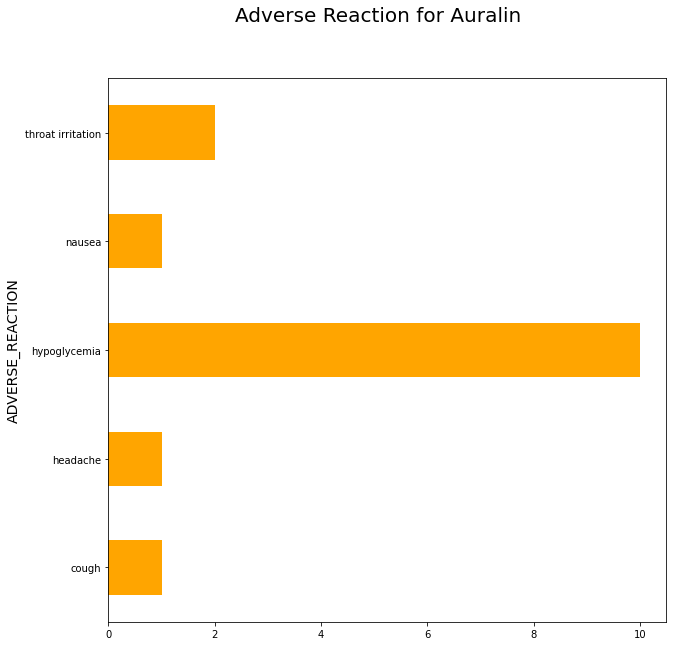

In [63]:
# Extract and plot the adverse_reaction of Auralin only

auralin_react= df_treatments_clean.query('treatment == "auralin"')

auralin_react.groupby('adverse_reaction').count()['patient_id'].plot(kind= 'barh', figsize= (10,10), color= 'orange', stacked= False)
plt.suptitle('Adverse Reaction for Auralin', size= 20)
plt.ylabel('ADVERSE_REACTION', size= 14)
plt.show()

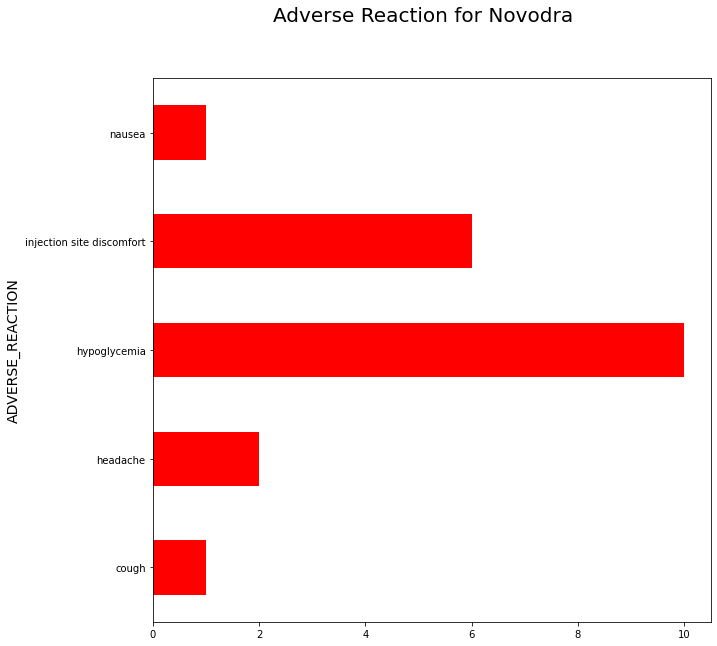

In [64]:
# Extract and plot the adverse_reaction of Novodra only

novodra_react= df_treatments_clean.query('treatment == "novodra"')

novodra_react.groupby('adverse_reaction').count()['patient_id'].plot(kind= 'barh', figsize= (10,10), color= 'red', stacked= False)
plt.suptitle('Adverse Reaction for Novodra', size= 20)
plt.ylabel('ADVERSE_REACTION', size= 14)
plt.show()

> Between the two drugs; Auralin and Novodra, The count of each adverse reactions are pretty similar.

### Pre_Trial Post_Trial Mean Insulin Dose Change



> Dose change is important because if the new oral insulin requires a higher dosage to be effective, the manufacturer might not bring this to market because it wouldnt be financially feasible

In [65]:
# Create a new column under treatment table

df_treatments_clean['dose_change']= df_treatments_clean['dose_start'] - df_treatments_clean['dose_end']

# Get the mean insulin dose change

dose_change_mean= df_treatments_clean.groupby('treatment')[['dose_change']].mean()
dose_change_mean

,dose_change
treatment,
auralin,-8.325714
novodra,0.385057


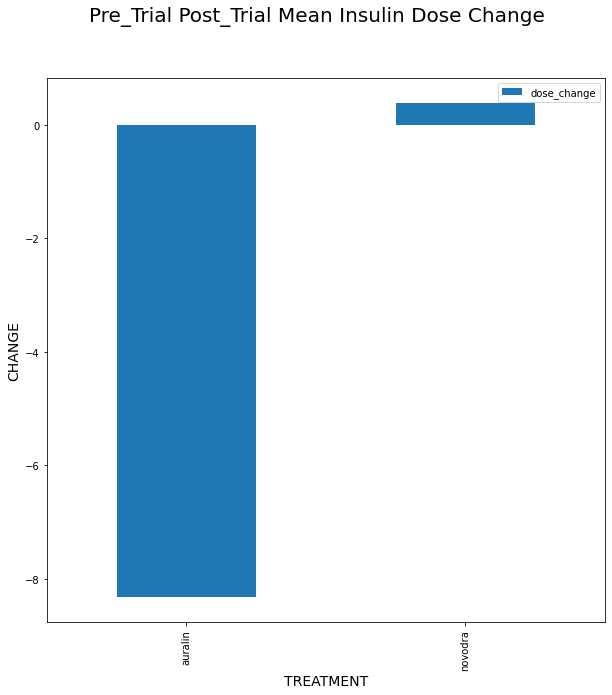

In [66]:
# plot the mean insulin dose change

dose_change_mean.plot(kind= 'bar', figsize= (10,10), stacked= False)
plt.suptitle('Pre_Trial Post_Trial Mean Insulin Dose Change', size= 20)
plt.xlabel('TREATMENT', size= 14)
plt.ylabel('CHANGE', size= 14)
plt.show()

> The results here are good for Auralin. Patients that were treated with Auralin required on average, 8 more units of insulin to establish a safe, steady blood sugar level compared to Novodra patients who on average required 0.4 units less of Insulin. Auralin requiring 8 more units is expected because we knew that orsl insulin has a tiugher time getting into the bloodstream through the stomach lining, and 8 units more isnt a big deal.

### Pre_Trial Post_Trial Mean Hba1c Change



> Hba1c change is a key indicator for diabetes control. Most patients in this trial start around 7.9 percent so if we can establish that auralin causes a reduction in Hba1c thats similar to the current injectable insulin standard, thats a success.

In [67]:
# Get the mean hba1c change

hba1c_change_mean= df_treatments_clean.groupby('treatment')[['hba1c_change']].mean()
hba1c_change_mean

,hba1c_change
treatment,
auralin,0.387657
novodra,0.404713


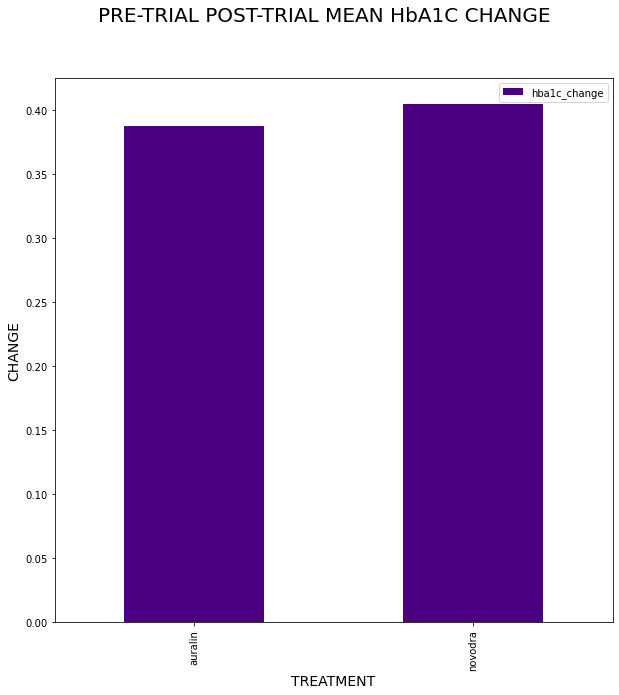

In [68]:
# plot the mean hba1c change

hba1c_change_mean.plot(kind= 'bar', figsize= (10,10), color= 'indigo', stacked= False)
plt.suptitle('PRE-TRIAL POST-TRIAL MEAN HbA1C CHANGE', size= 20)
plt.xlabel('TREATMENT', size= 14)
plt.ylabel('CHANGE', size= 14)
plt.show()

> The results are encouraging. Auralin oral insulin is similarly effective to Novodra injectable insulin.

## Conclusion

> Our Oral insulin passed phase II clinical trials!. A successful phase II trial means we have a good chance of making it past phase III and the regulatory review process to make it to market.


> If it does go to the market, this oral insulin would be an enormous breakthrough in treating Type I and Type II diabetes patients, as freedom from daily injections would liberate patients, reduce missed doses and therefore reduce irritating and sometimes serious complications from diabetes.


